#TAG SMART EMAIL  

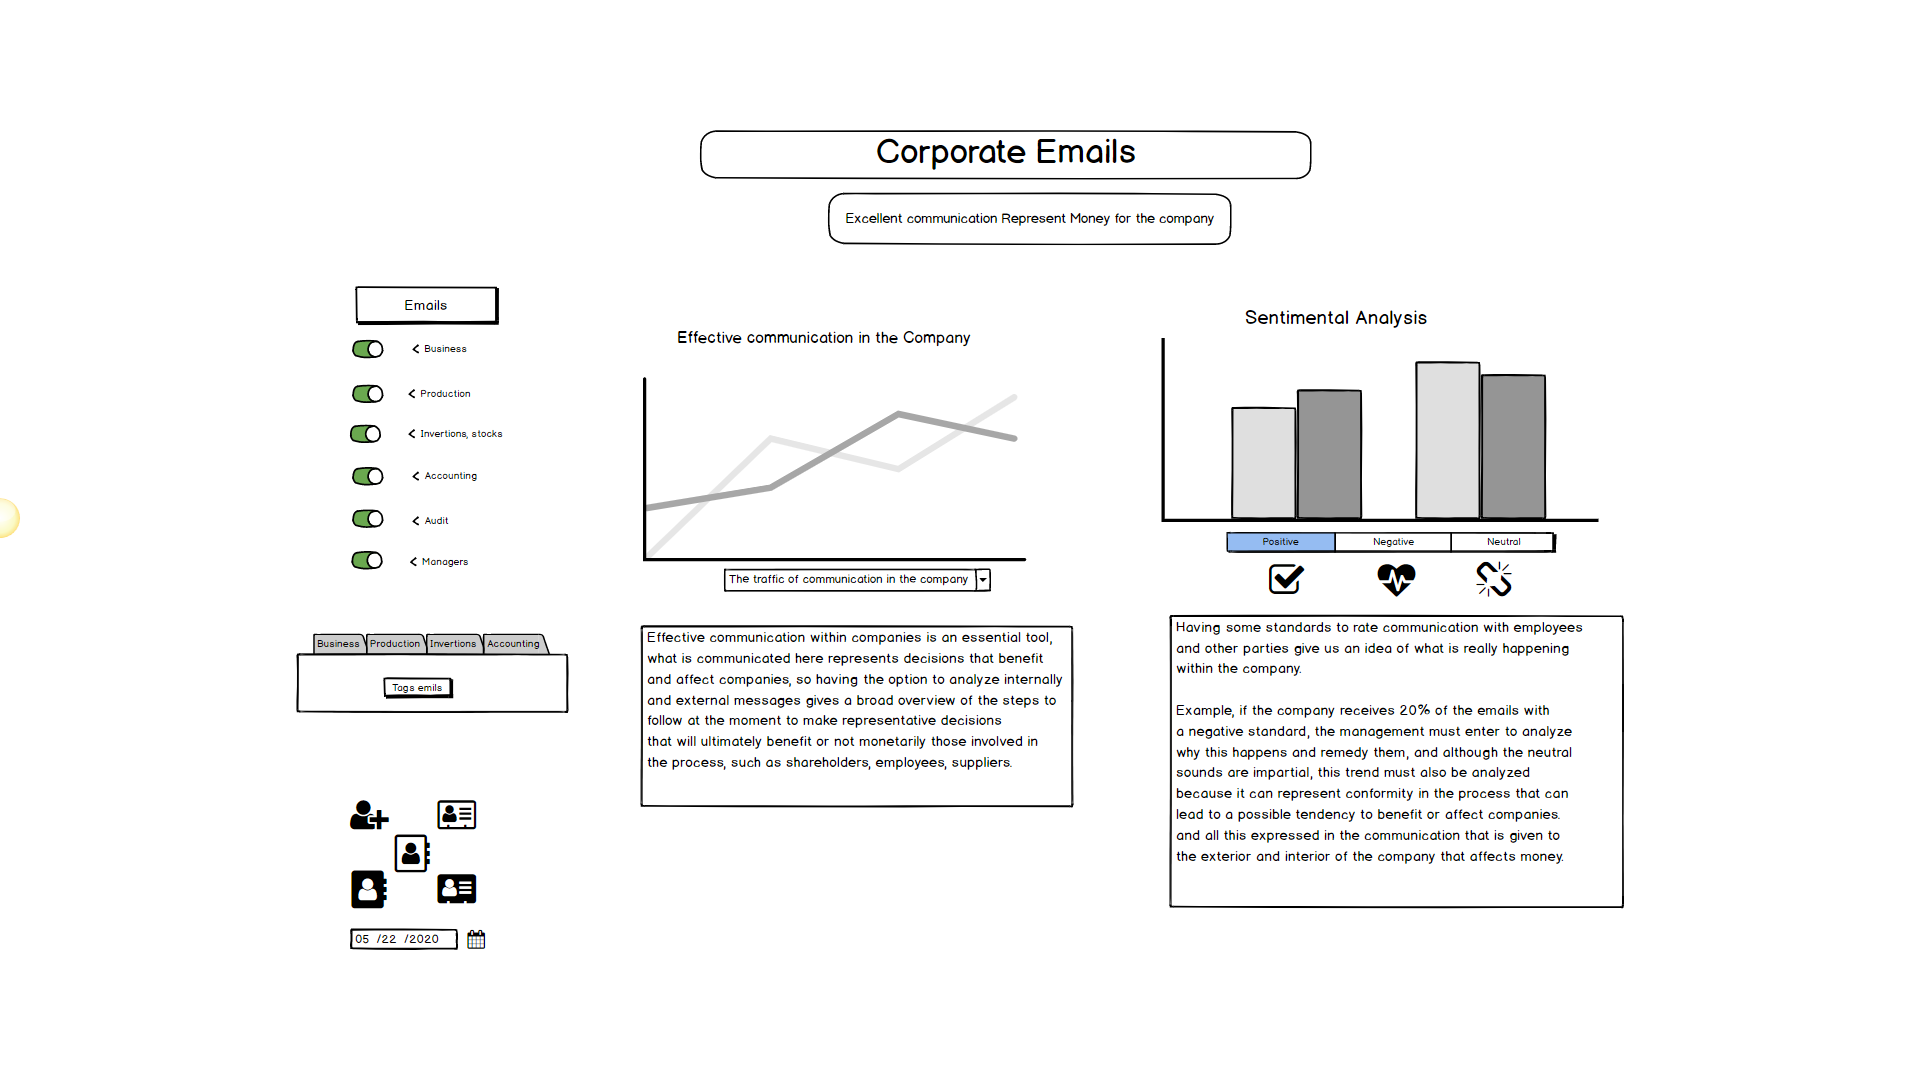

In [0]:
from PIL import Image
# load the image
schema = Image.open('scheme.png')
schema

In [157]:
!pip install vaderSentiment

In [158]:
#import Library
import pandas as pd
import string
import numpy as np
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [159]:
import requests
url = 'https://raw.githubusercontent.com/Moly-malibu/Tag-Smart-Emails/master/Enronemails.csv?token=AN2RW2GGHXCN4RRW3NT6C2S65KRHS'
myfile = requests.get(url)
open('email.csv', 'wb').write(myfile.content)

24004915

In [160]:
#EMAILS FROM ENRON COMPANY SAMPLING
df = pd.read_csv("email.csv").drop(['Unnamed: 0'], axis=1)
print(df.shape) 
df.head(7)

(10000, 2)


,file,message
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...
5,allen-p/_sent_mail/1002.,Message-ID: <30965995.1075863688265.JavaMail.e...
6,allen-p/_sent_mail/1003.,Message-ID: <16254169.1075863688286.JavaMail.e...


In [161]:
 df.index

RangeIndex(start=0, stop=10000, step=1)

In [162]:
[s.strip() for s in df['message'][100].splitlines()]

['Message-ID: <15940494.1075855689309.JavaMail.evans@thyme>',
 'Date: Wed, 16 Aug 2000 05:35:00 -0700 (PDT)',
 'From: phillip.allen@enron.com',
 'To: cooper.richey@enron.com',
 'Subject: Re:',
 'Mime-Version: 1.0',
 'Content-Type: text/plain; charset=us-ascii',
 'Content-Transfer-Encoding: 7bit',
 'X-From: Phillip K Allen',
 'X-To: Cooper Richey',
 'X-cc:',
 'X-bcc:',
 "X-Folder: \\Phillip_Allen_Dec2000\\Notes Folders\\'sent mail",
 'X-Origin: Allen-P',
 'X-FileName: pallen.nsf',
 '',
 "I tried the new address but I don't have access.  also, what do I need to",
 'enter under domain?']

In [163]:
emails = ' '.join([s.strip() for s in df['message'][1].splitlines()][15:])
emails

" Traveling to have a business meeting takes the fun out of the trip.  Especially if you have to prepare a presentation.  I would suggest holding the business plan meetings here then take a trip without any formal business meetings.  I would even try and get some honest opinions on whether a trip is even desired or necessary.  As far as the business meetings, I think it would be more productive to try and stimulate discussions across the different groups about what is working and what is not.  Too often the presenter speaks and the others are quiet just waiting for their turn.   The meetings might be better if held in a round table discussion format.  My suggestion for where to go is Austin.  Play golf and rent a ski boat and jet ski's.  Flying somewhere takes too much time."

In [0]:
#CLEAN DATASET
import re
import html
def cleanup_html(raw_html):
    clean_html = re.sub(r'<.*?>', '', raw_html)
    clean_html_http = re.sub(r'http\S+([\.]{3})?', '', clean_html)
    clean_txt = html.unescape(clean_html)
    return clean_txt
df['email_body'] = df['message'].apply(cleanup_html)

In [165]:
def cleanemail(email):
    return ' '.join([s.strip() for s in email.splitlines()][15:])

df['email_body'] = df['message'].apply(cleanemail)
df["email_body"].value_counts(sort=True).head()

 most bullish thing at this point is moving closer to everyone's psychological $4 price target and that everybody and their dog is still short.  next sellers need to be from producer community.  saw a little this week with williams hedging the barrett transaction but wouldnt say thats indicative of the rest of the e&p community.  short covering rallies will get more common here.  velocity of move down has slowed significantly for good (except maybe in bid week).  my concern is if we go to $4 and people want to cover some shorts, who's selling it to them?  might feel a lot like it did when we were trying to break $5.    9
 Reagan,  Just wanted to give you an update.  I have changed the unit mix to include some 1 bedrooms and reduced the number of buildings to 12.  Kipp Flores is working on the construction drawings.  At the same time I am pursuing FHA financing.  Once the construction drawings are complete I will send them to you for a revised bid.  Your original bid was competitive and

In [166]:
df.sort_values(by='email_body', ascending=False).head(5)

,file,message,email_body
9408,badeer-r/notes_inbox/62.,Message-ID: <22495830.1075863605235.JavaMail.e...,zalaywan@caiso.com Mime-Version: 1.0 Content-T...
9165,badeer-r/discussion_threads/215.,Message-ID: <26362480.1075863601560.JavaMail.e...,zalaywan@caiso.com Mime-Version: 1.0 Content-T...
8896,badeer-r/all_documents/62.,Message-ID: <9019069.1075863588438.JavaMail.ev...,zalaywan@caiso.com Mime-Version: 1.0 Content-T...
8306,arora-h/inbox/69.,Message-ID: <20199224.1075862674172.JavaMail.e...,"warrick.franklin@enron.com, paul.lewis@enron.c..."
8087,arora-h/deleted_items/183.,Message-ID: <19460356.1075861397603.JavaMail.e...,"warrick.franklin@enron.com, paul.lewis@enron.c..."


In [0]:
from bs4 import BeautifulSoup

#clean DF
def clean_email(desc):
  soup = BeautifulSoup(desc)
  return soup.get_text()
df['email_body'] = df['email_body'].apply(clean_email)
df['words_length']  = df['email_body'].str.len()

In [0]:
#CLEAN DATA

#Str the data
df['email_body'] = df['email_body'].astype(str)

#remove whitespace
df['email_body'] = df['email_body'].str.strip().str.lower()

#Start with date
df['email_body'].str.match('\d?\d/\d?\d/\d{4}').all()

#\s indicates a white space. So [^\s] is any non-white space and includes letters, numbers, special characters
df['email_body'] = df['email_body'].str.replace('[^a-zA-Z\s]', '').str.replace('\s+', ' ')

In [0]:
#Vander model
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer() 

def vaderizeSentiment(sentence):
    return analyzer.polarity_scores(sentence)

In [0]:
#creared columns score with numbers
df['Scores'] = df['email_body'].apply(vaderizeSentiment)

In [0]:
#Create score by differente classification position into the text
df[['negative', 'neutral', 'positive', 'compound']] = df.Scores.apply(pd.Series)

In [172]:
#Topics by Score
for text in df.sort_values(by='neutral', ascending=False)['email_body'].head(5):
    print(f"------ Topic ------")
    print(text, end="\n")

------ Topic ------
here is our forecast
------ Topic ------
mark here is a spreadsheet detailing our september socal trades i did not distinguish between buys vs sells phillip
------ Topic ------
brenda can you send me your address in college station phillip
------ Topic ------
you in town this weekend
------ Topic ------
kim i will not be at the may management mtg as i will be in ny on business


In [0]:
#Model to see final prediction
Model = SentimentIntensityAnalyzer()
def score(sentence, Model):
    return Model.polarity_scores(sentence)['compound']

# Sentiment score
df['final_score'] = df['email_body'].apply(lambda x: score(x, Model))

#Discretize variable.
df['final_pred'] = pd.cut(df['final_score'], bins=5, labels=[1, 2, 3, 4, 5])
df = df.drop('final_score', axis=1).sort_values(by=['file','final_pred']).iloc[:5]

In [174]:
df

,file,message,email_body,words_length,Scores,negative,neutral,positive,compound,final_pred
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...,here is our forecast,22,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000,3
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...,traveling to have a business meeting takes the...,783,"{'neg': 0.0, 'neu': 0.893, 'pos': 0.107, 'comp...",0.000,0.893,0.107,0.9313,5
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...,test successful way to go,30,"{'neg': 0.0, 'neu': 0.513, 'pos': 0.487, 'comp...",0.000,0.513,0.487,0.5859,4
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...,randy can you send me a schedule of the salary...,183,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000,3
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...,lets shoot for tuesday at,33,"{'neg': 0.375, 'neu': 0.625, 'pos': 0.0, 'comp...",0.375,0.625,0.000,-0.3400,2


In [175]:
#Pencentage in the classification.
df['final_pred'].value_counts(normalize=True) * 100

3    40.0
5    20.0
4    20.0
2    20.0
1     0.0
Name: final_pred, dtype: float64

In [0]:
df = df.drop('Scores', axis=1)

## Logistic Regression 

Logistic Regression take features and predict a continuous output.

In [0]:
from sklearn.model_selection import train_test_split
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm

train_x, valid_x, train_y, valid_y = model_selection.train_test_split(df['email_body'], df['final_pred'])

In [0]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

encoder = preprocessing.LabelEncoder()

train_y = encoder.fit_transform(train_y)
valid_y = encoder.fit_transform(valid_y)
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=5000)

tfidf_vect.fit(df['email_body'])

xtrain_tfidf = tfidf_vect.transform(train_x)
xvalid_tfidf = tfidf_vect.transform(valid_x)

In [178]:
from sklearn.linear_model import LogisticRegression
model = linear_model.LogisticRegression().fit(xtrain_tfidf, train_y)

# Model summary
LogisticRegression(C=1.0, class_weight=None, dual=False, 
                   fit_intercept=True, intercept_scaling=1, 
                   max_iter=100, multi_class='ovr', n_jobs=1,
                   penalty='l2', random_state=None, 
                   solver='liblinear', tol=0.0001, 
                   verbose=0, warm_start=False)

# Checking accuracy
accuracy = metrics.accuracy_score(model.predict(xvalid_tfidf), valid_y)
print ("Accuracy: ", accuracy)

Accuracy:  0.5


##KNN

Nearest Neighbors is a model that has the process for each target word to be refined, the top-k semantically similar nearest neighbors are first selected and ranked in descending order of their cosine similarities. The left ranked list shows the top 10 nearest neighbors for the target word good.

The semantically ranked list is then sentimentally re-ranked based on the absolute difference of the valence scores between the target word and the words in the list. A smaller difference indicates that the word is more sentimentally similar to the target word, and thus will be ranked higher. the re-ranking step can rank the sentimentally similar neighbors higher and the dissimilar neighbors lower. In the refinement model, the higher ranked sentimentally similar neighbors will receive a higher weight to refine the pre-trained vector of the target word.

In [179]:
#create Data Clean desc
tags = df['email_body']
tags

0                                 here is our forecast
1    traveling to have a business meeting takes the...
2                            test successful way to go
3    randy can you send me a schedule of the salary...
4                           lets shoot for tuesday at 
Name: email_body, dtype: object

In [180]:
#Count Vectorizer 
vector = CountVectorizer(stop_words='english')

# build vocab
vector.fit(tags)

# transform text
tags_vector = vector.transform(tags)

type(tags_vector.todense())

numpy.matrix

In [181]:
#matrix
tags_vector.todense()

matrix([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 4, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
         1, 1, 1, 1, 0, 0, 1, 4, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
         0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 2, 0, 1, 0, 1,
         1, 3, 2, 0, 1, 1, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
         0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
         1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
         0, 0, 0, 0, 0, 0, 0, 0],


In [182]:
#features name, Get Word Counts for each document
dtm = pd.DataFrame(tags_vector.todense(), columns=vector.get_feature_names())
dtm.head()

,austin,better,boat,business,changes,desired,different,discussion,discussions,especially,example,far,flying,forecast,formal,format,fun,golf,group,groups,held,holding,honest,jet,just,lets,level,meeting,meetings,necessary,need,opinions,patti,phillip,plan,play,plus,prepare,presentation,presenter,productive,quiet,randy,rent,round,salary,schedule,scheduling,send,shoot,ski,skis,speaks,stimulate,successful,suggest,suggestion,table,takes,test,think,thoughts,time,traveling,trip,try,tuesday,turn,waiting,way,working
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,4,0,1,1,1,1,1,0,1,1,0,1,1,1,1,0,1,1,1,1,1,1,0,0,1,4,1,0,1,0,0,1,1,0,1,1,1,1,1,0,1,1,0,0,0,0,0,1,1,1,1,0,1,1,1,2,0,1,0,1,1,3,2,0,1,1,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [183]:
sum(dtm['business'])

4

In [0]:
#Attributes
result = []
for col in dtm:
  x = sum(dtm[col])
  result.append(x)

data = zip(vector.get_feature_names(), result)
words = pd.DataFrame(data, columns=['words', 'count'])

In [185]:
words['rank'] = words['count'].rank(method='first',ascending=False)
words.tail()

,words,count,rank
66,tuesday,1,67.0
67,turn,1,68.0
68,waiting,1,69.0
69,way,1,70.0
70,working,1,71.0


In [186]:
words[words['rank'] <=10]

,words,count,rank
0,austin,1,6.0
1,better,1,7.0
2,boat,1,8.0
3,business,4,1.0
4,changes,1,9.0
5,desired,1,10.0
28,meetings,4,2.0
58,takes,2,4.0
64,trip,3,3.0
65,try,2,5.0


In [187]:
from sklearn.neighbors import NearestNeighbors

#Fit on DTM

nn = NearestNeighbors(n_neighbors=5, algorithm='kd_tree')
nn.fit(dtm)

NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [188]:
nn.kneighbors([dtm.iloc[0].values])

(array([[0.        , 2.        , 2.        , 3.87298335, 9.74679434]]),
 array([[0, 2, 4, 3, 1]]))

In [189]:
#Query using kneighbors

nn.kneighbors([dtm.iloc[3]])

(array([[ 0.        ,  3.87298335,  4.12310563,  4.12310563, 10.39230485]]),
 array([[3, 0, 2, 4, 1]]))

In [190]:
#Query using kneighbors

nn.kneighbors([dtm.iloc[3]])

(array([[ 0.        ,  3.87298335,  4.12310563,  4.12310563, 10.39230485]]),
 array([[3, 0, 2, 4, 1]]))

In [191]:
tags[3][:200]

'randy can you send me a schedule of the salary and level of everyone in the scheduling group plus your thoughts on any changes that need to be made patti s for example phillip'

##Graphics Sentimental Analysis

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


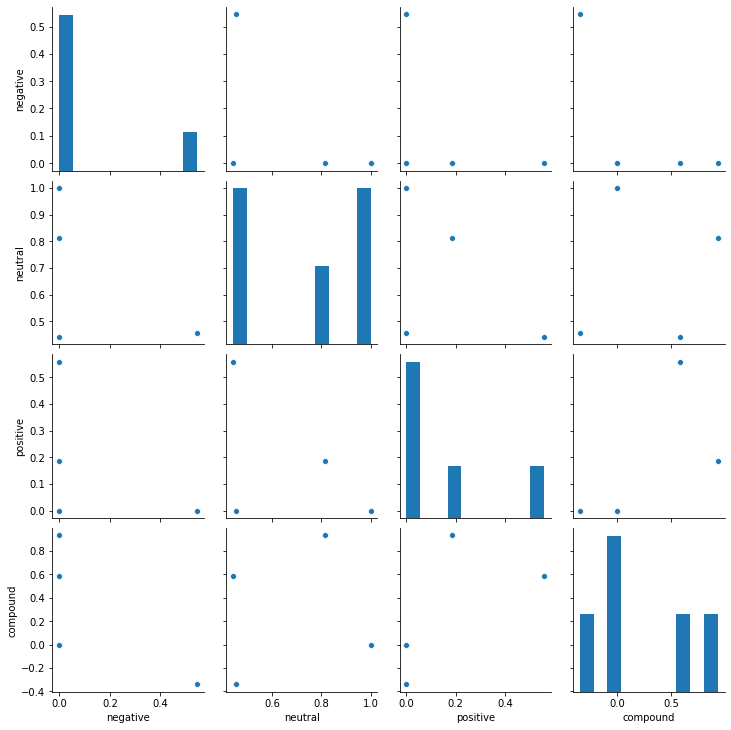

In [0]:
import seaborn as sns
sns.pairplot(df[['negative', 'neutral', 'positive', 'compound']]);

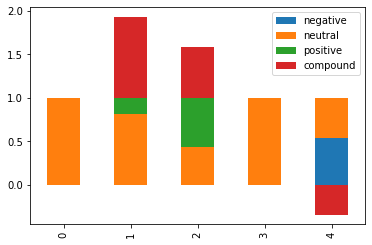

In [0]:
df.plot.bar(stacked=True);

In [0]:
import plotly.express as px

fig = px.histogram(df, x='final_pred', template='plotly_white', title='Email Sentimental Analysis')
fig.update_xaxes(categoryorder='total descending').update_yaxes(title='Emails Tendence')
fig.show()

In [0]:
import plotly.graph_objects as go
fig = go.Figure(data=go.Bar(y=['negative', 'neutral', 'positive', 'compound']))
fig.show()

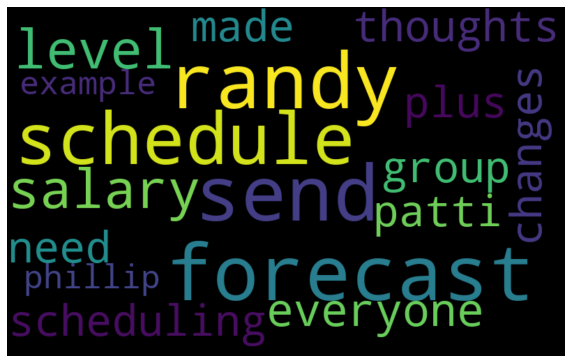

In [0]:
from wordcloud import WordCloud 
import matplotlib.pyplot as plt

normal_words =' '.join([text for text in df['body_email'][df['neutral'] == 1]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

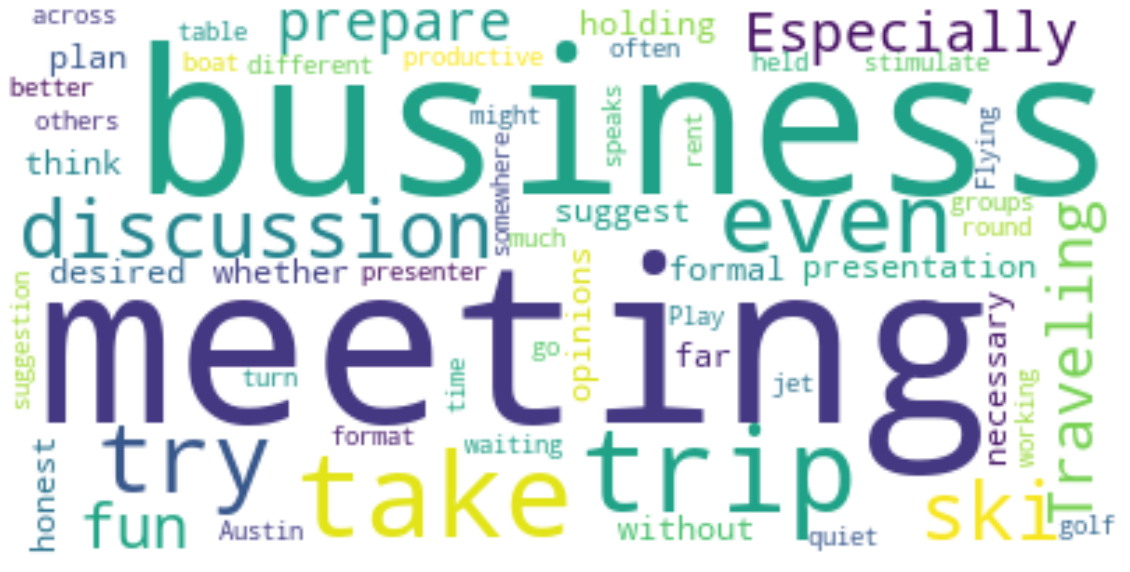

In [0]:
wordcloud_spam = WordCloud(background_color="white").generate(emails)

# Lines 2 - 5
plt.figure(figsize = (20,20))
plt.imshow(wordcloud_spam, interpolation='bilinear')
plt.axis("off")
plt.show()

##TFIDF Term Frequency - Inverse Document Frequency

"tf–idf or TFIDF, short for term frequency–inverse document frequency, is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus. It is often used as a weighting factor in searches of information retrieval, text mining, and user modeling. The tf–idf value increases proportionally to the number of times a word appears in the document and is offset by the number of documents in the corpus that contain the word, which helps to adjust for the fact that some words appear more frequently in general. " wikipedia

In [193]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [194]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

stop = stopwords.words('english')
sno = SnowballStemmer('english')

STOP_WORDS = list(STOP_WORDS)
print('\n'.join([word for word in STOP_WORDS[:10]]))

or
other
were
everywhere
someone
say
name
whatever
elsewhere
last


In [195]:
emails

" Traveling to have a business meeting takes the fun out of the trip.  Especially if you have to prepare a presentation.  I would suggest holding the business plan meetings here then take a trip without any formal business meetings.  I would even try and get some honest opinions on whether a trip is even desired or necessary.  As far as the business meetings, I think it would be more productive to try and stimulate discussions across the different groups about what is working and what is not.  Too often the presenter speaks and the others are quiet just waiting for their turn.   The meetings might be better if held in a round table discussion format.  My suggestion for where to go is Austin.  Play golf and rent a ski boat and jet ski's.  Flying somewhere takes too much time."

In [196]:
from nltk.tokenize import word_tokenize

# split into words
tokens = word_tokenize(emails)

# convert to lower case
tokens = [w.lower() for w in tokens]

# prepare regex for char filtering
re_punc = re.compile('[%s]' % re.escape(string.punctuation))

# remove punctuation from each word
stripped = [re_punc.sub('', w) for w in tokens]

# remove remaining tokens that are not alphabetic
words = [word for word in stripped if word.isalpha()]

# filter out stop words
stop_words = set(stopwords.words('english'))
words = [w for w in words if not w in stop_words]
print(words[:200])

['traveling', 'business', 'meeting', 'takes', 'fun', 'trip', 'especially', 'prepare', 'presentation', 'would', 'suggest', 'holding', 'business', 'plan', 'meetings', 'take', 'trip', 'without', 'formal', 'business', 'meetings', 'would', 'even', 'try', 'get', 'honest', 'opinions', 'whether', 'trip', 'even', 'desired', 'necessary', 'far', 'business', 'meetings', 'think', 'would', 'productive', 'try', 'stimulate', 'discussions', 'across', 'different', 'groups', 'working', 'often', 'presenter', 'speaks', 'others', 'quiet', 'waiting', 'turn', 'meetings', 'might', 'better', 'held', 'round', 'table', 'discussion', 'format', 'suggestion', 'go', 'austin', 'play', 'golf', 'rent', 'ski', 'boat', 'jet', 'ski', 'flying', 'somewhere', 'takes', 'much', 'time']


In [197]:
from sklearn.feature_extraction.text import CountVectorizer

count_vec = CountVectorizer(stop_words="english", analyzer='word', 
                            ngram_range=(1, 2), max_df=1.0, min_df=1, 
                            max_features=None)

count_train = count_vec.fit(words)
bag_of_words = count_vec.transform(words)

print(count_vec.get_feature_names())

['austin', 'better', 'boat', 'business', 'desired', 'different', 'discussion', 'discussions', 'especially', 'far', 'flying', 'formal', 'format', 'fun', 'golf', 'groups', 'held', 'holding', 'honest', 'jet', 'meeting', 'meetings', 'necessary', 'opinions', 'plan', 'play', 'prepare', 'presentation', 'presenter', 'productive', 'quiet', 'rent', 'round', 'ski', 'speaks', 'stimulate', 'suggest', 'suggestion', 'table', 'takes', 'think', 'time', 'traveling', 'trip', 'try', 'turn', 'waiting', 'working']


In [198]:
words_iteration = TfidfVectorizer(smooth_idf=False, 
                              sublinear_tf=False, 
                              norm=None, analyzer='word')
txt_fitted = words_iteration.fit(words)
txt_transformed = txt_fitted.transform(words)
print ("Email body: ", words)

Email body:  ['traveling', 'business', 'meeting', 'takes', 'fun', 'trip', 'especially', 'prepare', 'presentation', 'would', 'suggest', 'holding', 'business', 'plan', 'meetings', 'take', 'trip', 'without', 'formal', 'business', 'meetings', 'would', 'even', 'try', 'get', 'honest', 'opinions', 'whether', 'trip', 'even', 'desired', 'necessary', 'far', 'business', 'meetings', 'think', 'would', 'productive', 'try', 'stimulate', 'discussions', 'across', 'different', 'groups', 'working', 'often', 'presenter', 'speaks', 'others', 'quiet', 'waiting', 'turn', 'meetings', 'might', 'better', 'held', 'round', 'table', 'discussion', 'format', 'suggestion', 'go', 'austin', 'play', 'golf', 'rent', 'ski', 'boat', 'jet', 'ski', 'flying', 'somewhere', 'takes', 'much', 'time']


In [199]:
iditeration = words_iteration.idf_
print(dict(zip(txt_fitted.get_feature_names(), iditeration)))

{'across': 5.31748811353631, 'austin': 5.31748811353631, 'better': 5.31748811353631, 'boat': 5.31748811353631, 'business': 3.9311937524164198, 'desired': 5.31748811353631, 'different': 5.31748811353631, 'discussion': 5.31748811353631, 'discussions': 5.31748811353631, 'especially': 5.31748811353631, 'even': 4.624340932976365, 'far': 5.31748811353631, 'flying': 5.31748811353631, 'formal': 5.31748811353631, 'format': 5.31748811353631, 'fun': 5.31748811353631, 'get': 5.31748811353631, 'go': 5.31748811353631, 'golf': 5.31748811353631, 'groups': 5.31748811353631, 'held': 5.31748811353631, 'holding': 5.31748811353631, 'honest': 5.31748811353631, 'jet': 5.31748811353631, 'meeting': 5.31748811353631, 'meetings': 3.9311937524164198, 'might': 5.31748811353631, 'much': 5.31748811353631, 'necessary': 5.31748811353631, 'often': 5.31748811353631, 'opinions': 5.31748811353631, 'others': 5.31748811353631, 'plan': 5.31748811353631, 'play': 5.31748811353631, 'prepare': 5.31748811353631, 'presentation': 5

In [200]:
words_iteration.vocabulary_

{'across': 0,
 'austin': 1,
 'better': 2,
 'boat': 3,
 'business': 4,
 'desired': 5,
 'different': 6,
 'discussion': 7,
 'discussions': 8,
 'especially': 9,
 'even': 10,
 'far': 11,
 'flying': 12,
 'formal': 13,
 'format': 14,
 'fun': 15,
 'get': 16,
 'go': 17,
 'golf': 18,
 'groups': 19,
 'held': 20,
 'holding': 21,
 'honest': 22,
 'jet': 23,
 'meeting': 24,
 'meetings': 25,
 'might': 26,
 'much': 27,
 'necessary': 28,
 'often': 29,
 'opinions': 30,
 'others': 31,
 'plan': 32,
 'play': 33,
 'prepare': 34,
 'presentation': 35,
 'presenter': 36,
 'productive': 37,
 'quiet': 38,
 'rent': 39,
 'round': 40,
 'ski': 41,
 'somewhere': 42,
 'speaks': 43,
 'stimulate': 44,
 'suggest': 45,
 'suggestion': 46,
 'table': 47,
 'take': 48,
 'takes': 49,
 'think': 50,
 'time': 51,
 'traveling': 52,
 'trip': 53,
 'try': 54,
 'turn': 55,
 'waiting': 56,
 'whether': 57,
 'without': 58,
 'working': 59,
 'would': 60}

In [201]:
words_interval = dict(zip(txt_fitted.get_feature_names(), 
                      iditeration))
words_interval

{'across': 5.31748811353631,
 'austin': 5.31748811353631,
 'better': 5.31748811353631,
 'boat': 5.31748811353631,
 'business': 3.9311937524164198,
 'desired': 5.31748811353631,
 'different': 5.31748811353631,
 'discussion': 5.31748811353631,
 'discussions': 5.31748811353631,
 'especially': 5.31748811353631,
 'even': 4.624340932976365,
 'far': 5.31748811353631,
 'flying': 5.31748811353631,
 'formal': 5.31748811353631,
 'format': 5.31748811353631,
 'fun': 5.31748811353631,
 'get': 5.31748811353631,
 'go': 5.31748811353631,
 'golf': 5.31748811353631,
 'groups': 5.31748811353631,
 'held': 5.31748811353631,
 'holding': 5.31748811353631,
 'honest': 5.31748811353631,
 'jet': 5.31748811353631,
 'meeting': 5.31748811353631,
 'meetings': 3.9311937524164198,
 'might': 5.31748811353631,
 'much': 5.31748811353631,
 'necessary': 5.31748811353631,
 'often': 5.31748811353631,
 'opinions': 5.31748811353631,
 'others': 5.31748811353631,
 'plan': 5.31748811353631,
 'play': 5.31748811353631,
 'prepare': 5

In [202]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate vectorizer object
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)

# Create a vocabulary and get word counts per document
data = tfidf.fit_transform(words) # Similiar to fit_predict

# Print word counts

# Get feature names to use as dataframe column headers
data = pd.DataFrame(data.todense(), columns=tfidf.get_feature_names())

# View Feature Matrix as DataFrame
data.head()

,austin,better,boat,business,desired,different,discussion,discussions,especially,far,flying,formal,format,fun,golf,groups,held,holding,honest,jet,meeting,meetings,necessary,opinions,plan,play,prepare,presentation,presenter,productive,quiet,rent,round,ski,speaks,stimulate,suggest,suggestion,table,takes,think,time,traveling,trip,try,turn,waiting,working
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
#TOKENIZER AND LEMMA
def tokenize(document):
    
    doc = nlp(document)
    
    return [token.lemma_.strip() for token in doc if (token.is_stop != True) and (token.is_punct != True)]

In [204]:
import spacy

nlp = spacy.load('en_core_web_sm')

# Instantiate vectorizer object
tfidf = TfidfVectorizer(stop_words='english', 
                        ngram_range=(1,2),
                        max_df=.97,
                        min_df=3,
                        tokenizer=tokenize)

# Create a vocabulary and get word counts per document
data = tfidf.fit_transform(words) # Similiar to fit_predict

# Get feature names to use as dataframe column headers
data = pd.DataFrame(data.todense(), columns=tfidf.get_feature_names())

# View Feature Matrix as DataFrame
data.head()

,business,meeting,trip
0,0.0,0.0,0.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0


In [0]:
# Calculate Distance of TF-IDF Vectors
from sklearn.metrics.pairwise import cosine_similarity

dist_matrix  = cosine_similarity(data)

In [0]:
# Turn it into a DataFrame

df = pd.DataFrame(dist_matrix)

In [207]:
words[5][:300]

'trip'

In [208]:
print(words[12][:130])

business


In [209]:
sum(data['business'])

4.0